# 数据管道构建：Dataset、DataLoader与Transforms完全指南

## 0、完整的数据流示例

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

#步骤1: 定义Dataset
class MyDataset(Dataset):
    """这是数据的"目录"，知道数据在哪里"""
    def __init__(self, image_folder, transform=None):
        self.image_paths = [
            os.path.join(image_folder, f) 
            for f in os.listdir(image_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
        ]
        self.transform = transform
        print(f"✅ Dataset初始化完成，找到{len(self.image_paths)}个文件")
    
    def __len__(self):
        """告诉DataLoader有多少数据"""
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        """返回第idx个样本"""
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image

# 步骤2: 定义Transform 
transform = transforms.Compose([
    transforms.Resize((224, 224)),     # 调整大小
    transforms.ToTensor(),             # 转为Tensor
    transforms.Normalize(              # 归一化
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
print("✅ Transform定义完成")

# 步骤3: 创建DataLoader 
dataset = MyDataset(r'D:\深度学习\learn_torch\练手数据集(1)\练手数据集\train\ants_image', transform=transform)
loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=0  # Windows下建议设为0
)
print(f"✅ DataLoader创建完成，共{len(loader)}个批次")

#  步骤4: 使用DataLoader
for batch_idx, images in enumerate(loader):
    print(f"\n📦 Batch {batch_idx}:")
    print(f"  形状: {images.shape}")  # (4, 3, 224, 224)
    
    # 在这里进行模型训练
    # outputs = model(images)
    # loss = criterion(outputs, labels)
    # ...
    
    if batch_idx >= 2:  # 只演示3个批次
        break


✅ Transform定义完成
✅ Dataset初始化完成，找到123个文件
✅ DataLoader创建完成，共31个批次

📦 Batch 0:
  形状: torch.Size([4, 3, 224, 224])

📦 Batch 1:
  形状: torch.Size([4, 3, 224, 224])

📦 Batch 2:
  形状: torch.Size([4, 3, 224, 224])


## 1、Dataset详解

训练集大小: 60000
测试集大小: 10000
图像形状: torch.Size([1, 28, 28])
标签: 5


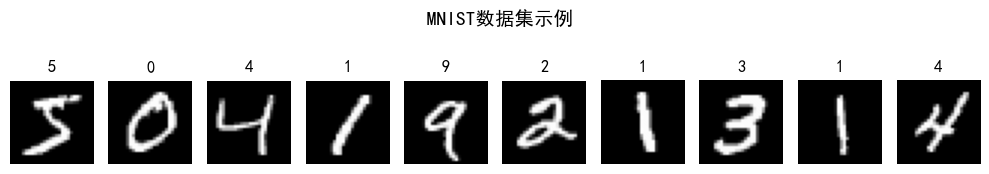

In [ ]:
#使用内置dataset
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 下载MNIST数据集 
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root='./data',           # 数据存储路径
    train=True,              # 训练集
    download=True,           # 自动下载
    transform=transform      # 转换为Tensor
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,             # 测试集
    download=True,
    transform=transform
)

print(f"训练集大小: {len(train_dataset)}")  # 60000
print(f"测试集大小: {len(test_dataset)}")   # 10000

# 查看单个样本 
image, label = train_dataset[0]
print(f"图像形状: {image.shape}")  # torch.Size([1, 28, 28])
print(f"标签: {label}")            # 5

# 可视化
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 2))
for i in range(10):
    image, label = train_dataset[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'{label}')
    plt.axis('off')
plt.suptitle(' MNIST数据集示例', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('mnist_samples.png', dpi=150, bbox_inches='tight')
plt.show()


In [8]:
# 图像分类
from torchvision import datasets

datasets.MNIST        # 手写数字（0-9）
datasets.FashionMNIST # 服饰图像
datasets.CIFAR10      # 10类自然图像
datasets.CIFAR100     # 100类自然图像
datasets.ImageNet     # 大规模图像分类

# 目标检测
datasets.CocoDetection  # COCO数据集



torchvision.datasets.coco.CocoDetection

In [ ]:
#自定义dataset（基础Dataset类）
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import numpy as np

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        """
        参数:
            annotations_file: 标注文件路径（如CSV）
            img_dir: 图像目录
            transform: 数据预处理转换
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
    
    def __len__(self):
        """返回数据集大小"""
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        """
        获取单个样本
        返回: (image, label)
        """
        # 获取图像路径和标签
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')  # 转换为RGB
        label = self.img_labels.iloc[idx, 1]
        
        # 应用数据增强/预处理
        if self.transform:
            image = self.transform(image)
        
        return image, label

# 使用示例
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

dataset = CustomImageDataset(
    annotations_file='labels.csv',
    img_dir='images/',
    transform=transform
)

# 创建DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [1]:
#实战：CSV数据集
import torch
from torch.utils.data import Dataset
import pandas as pd
import numpy as np

#  创建示例CSV文件
data = {
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'feature3': np.random.randn(1000),
    'label': np.random.randint(0, 3, 1000)  # 3分类问题
}
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
print(" 已创建示例CSV文件")

#  自定义CSV Dataset
class CSVDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # 获取特征和标签
        features = self.data.iloc[idx, :-1].values.astype(np.float32)
        label = self.data.iloc[idx, -1]
        
        # 转换为Tensor
        features = torch.tensor(features)
        label = torch.tensor(label, dtype=torch.long)
        
        if self.transform:
            features = self.transform(features)
        
        return features, label

# 使用Dataset
dataset = CSVDataset('data.csv')
print(f"数据集大小: {len(dataset)}")

# 获取一个样本
features, label = dataset[0]
print(f"特征形状: {features.shape}")  # torch.Size([3])
print(f"标签: {label}")

# 获取多个样本
features_batch = []
labels_batch = []
for i in range(5):
    f, l = dataset[i]
    features_batch.append(f)
    labels_batch.append(l)
    
features_batch = torch.stack(features_batch)
labels_batch = torch.stack(labels_batch)
print(f"批量特征形状: {features_batch.shape}")  # (5, 3)
print(f"批量标签形状: {labels_batch.shape}")    # (5,)


 已创建示例CSV文件
数据集大小: 1000
特征形状: torch.Size([3])
标签: 2
批量特征形状: torch.Size([5, 3])
批量标签形状: torch.Size([5])


## 2、Transforms数据变换

In [2]:
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import os
os.chdir(r'D:\深度学习\daily learning(go go go)')
print(f"当前工作目录: {os.getcwd()}")
# = 下载一张示例图片 
url = "https://pytorch.org/assets/images/pytorch-logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')
print(f"原始图像大小: {img.size}")
img_tensor = transforms.ToTensor()(img)
Writer = SummaryWriter('logs')
Writer.add_image('原始图像', img_tensor)
Writer.close()

当前工作目录: D:\深度学习\daily learning(go go go)


e:\Anaconda\envs\torch5060\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


原始图像大小: (2500, 2500)


In [3]:
# 1. 基础变换 
# Resize: 调整大小
resize_transform = transforms.Resize((224, 224))
img_resized = resize_transform(img)
print(f"Resize后: {img_resized.size}")
Writer.add_image('调整大小后的图像', transforms.ToTensor()(img_resized))

# CenterCrop: 中心裁剪
crop_transform = transforms.CenterCrop(100)
img_cropped = crop_transform(img_resized)
print(f"裁剪后: {img_cropped.size}")
Writer.add_image('中心裁剪后的图像', transforms.ToTensor()(img_cropped))

# RandomCrop: 随机裁剪
random_crop = transforms.RandomCrop(100)
img_random_crop = random_crop(img_resized)
Writer.add_image('随机裁剪后的图像', transforms.ToTensor()(img_random_crop))



Resize后: (224, 224)
裁剪后: (100, 100)


In [4]:
#  2. 颜色变换 
# RandomHorizontalFlip: 随机水平翻转
flip_transform = transforms.RandomHorizontalFlip(p=0.5)  # 50%概率
img_flipped = flip_transform(img)
Writer.add_image('水平翻转后的图像', transforms.ToTensor()(img_flipped))

# ColorJitter: 颜色抖动
color_jitter = transforms.ColorJitter(
    brightness=0.2,  # 亮度
    contrast=0.2,    # 对比度
    saturation=0.2,  # 饱和度
    hue=0.1          # 色调
)
img_jittered = color_jitter(img)
Writer.add_image('颜色抖动后的图像', transforms.ToTensor()(img_jittered))

# RandomRotation: 随机旋转
rotation = transforms.RandomRotation(degrees=15)
img_rotated = rotation(img)
Writer.add_image('随机旋转后的图像', transforms.ToTensor()(img_rotated))


In [5]:
#  3. 类型转换
# ToTensor: PIL Image/Numpy → Tensor
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)
print(f"ToTensor后: {img_tensor.shape}, dtype={img_tensor.dtype}")
print(f"值域: [{img_tensor.min():.3f}, {img_tensor.max():.3f}]")

# ToPILImage: Tensor → PIL Image
to_pil = transforms.ToPILImage()
img_pil = to_pil(img_tensor)
print(f"ToPILImage后: {img_pil.size},dtyoe = {type(img_pil)}")
Writer.add_image('Tensor转PIL后的图像', transforms.ToTensor()(img_pil))


ToTensor后: torch.Size([3, 2500, 2500]), dtype=torch.float32
值域: [0.000, 0.933]
ToPILImage后: (2500, 2500),dtyoe = <class 'PIL.Image.Image'>


In [6]:
# 4. 归一化
# Normalize: 标准化
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],  # ImageNet均值
    std=[0.229, 0.224, 0.225]     # ImageNet标准差
)
img_normalized = normalize(img_tensor)
print(f"归一化后值域: [{img_normalized.min():.3f}, {img_normalized.max():.3f}]")

归一化后值域: [-2.118, 1.958]


In [8]:
# 5. 组合变换 
# Compose: 链式组合多个变换
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

img_transformed = transform(img)
print(f"组合变换后: {img_transformed.shape}")
Writer.add_image('组合变换后的图像', img_transformed)

组合变换后: torch.Size([3, 224, 224])


## 3、DataLoader批量加载

In [12]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
Writer = SummaryWriter('logs')
# 准备数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.2435, 0.2616))  # CIFAR10的均值和标准差
])

train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 创建DataLoader 
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,           # 批量大小
    shuffle=True,            # 打乱数据
    num_workers=4,           # 多进程加载（Windows设为0）
    pin_memory=True,         # 锁页内存（GPU训练时建议True）
    drop_last=True          # 丢弃最后不足batch_size的数据
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
    drop_last=True
)
print(f"数据集大小: {len(train_dataset)}")
print(f"批次数量: {len(train_loader)}")  
print(f"每批样本数: {train_loader.batch_size}")

for epoch in range(3):
    step=0
    for data in train_loader:
        imgs,target =data 
        Writer.add_images("Epoch：{}".format(epoch),imgs,step)
        step += 1
Writer.close()


数据集大小: 50000
批次数量: 781
每批样本数: 64
